In [104]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend.plotting as ml
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import data_table
plt.style.use("fivethirtyeight")

In [18]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
x_train_val,x_train = x_train[0:3000]/255,x_train[3000:]/255
y_train_val,y_train = y_train[0:3000],y_train[3000:]
x_test = x_test/25

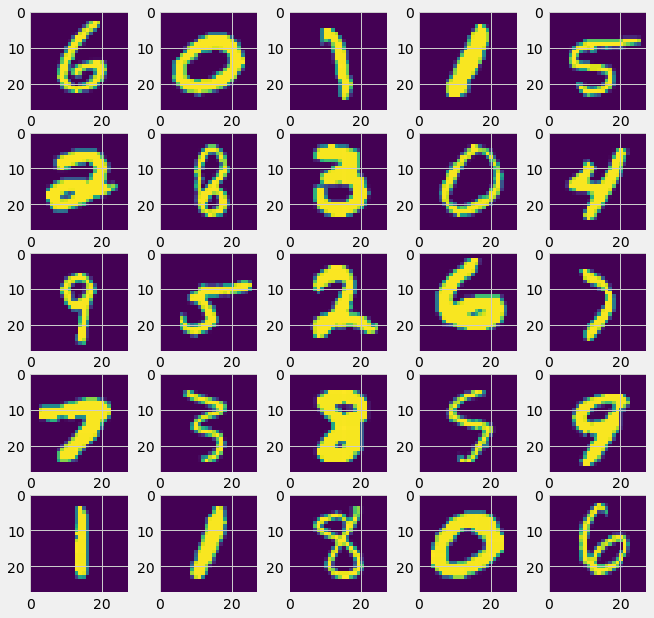

In [ ]:
plt.subplots(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])


# ***First Model***

In [20]:
model_one = tf.keras.models.Sequential()
model_one.add(tf.keras.layers.Conv1D(32,kernel_size=3,padding="valid",activation="relu",kernel_initializer="glorot_uniform",input_shape=(28,28)))
# model_one.add(tf.keras.layers.GaussianNoise(0.01))
model_one.add(tf.keras.layers.Conv1D(32,kernel_size=3,padding="valid",activation="relu",kernel_initializer="glorot_uniform"))
model_one.add(tf.keras.layers.MaxPooling1D())
model_one.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="valid",activation="relu",kernel_initializer="glorot_uniform"))
model_one.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="valid",activation="relu",kernel_initializer="glorot_uniform"))
model_one.add(tf.keras.layers.MaxPooling1D())
model_one.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="valid",activation="relu",kernel_initializer="glorot_uniform"))
model_one.add(tf.keras.layers.Flatten())
model_one.add(tf.keras.layers.Dropout(0.5))
model_one.add(tf.keras.layers.Dense(128,activation="relu"))
model_one.add(tf.keras.layers.Dropout(0.5))
model_one.add(tf.keras.layers.Dense(128,activation="relu"))
model_one.add(tf.keras.layers.Dropout(0.5))
model_one.add(tf.keras.layers.Dense(10,activation="softmax"))

In [21]:
model_one.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 26, 32)            2720      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 24, 32)            3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 10, 64)            6208      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 8, 64)             12352     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2, 64)            

In [22]:
model_one.compile(optimizer=tf.keras.optimizers.SGD(0.01,momentum=0.9,nesterov=True),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [23]:
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=10,verbose=1,restore_best_weights=True,)
ACCURACY_THRESHOLD = 0.98
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, epoch, logs=None): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
            self.model.stop_training = True 
          
check_point = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/CNN arch_relu with mnists",save_best_only=True,verbose=1)

In [24]:
history_one = model_one.fit(x_train,y_train,batch_size=128,epochs=1000,
          validation_data=(x_train_val,y_train_val),verbose=1,
          callbacks=[CustomCallback(),check_point])

Epoch 1/1000
446/446 [==============================] - 5s 9ms/step - loss: 1.4700 - accuracy: 0.4924 - val_loss: 0.3425 - val_accuracy: 0.9153

Epoch 00001: val_loss improved from inf to 0.34249, saving model to /content/drive/MyDrive/CNN arch_relu with mnists
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN arch_relu with mnists/assets
Epoch 2/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.4546 - accuracy: 0.8642 - val_loss: 0.1456 - val_accuracy: 0.9603

Epoch 00002: val_loss improved from 0.34249 to 0.14559, saving model to /content/drive/MyDrive/CNN arch_relu with mnists
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN arch_relu with mnists/assets
Epoch 3/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.2918 - accuracy: 0.9201 - val_loss: 0.1227 - val_accuracy: 0.9673

Epoch 00003: val_loss improved from 0.14559 to 0.12267, saving model to /content/drive/MyDrive/CNN arch_relu with mnists
INFO:tensorflow:Assets w

In [61]:
first_model_acc = model_one.evaluate(x_test,y_test)[1]
first_model_loss = model_one.evaluate(x_test,y_test)[0]

313/313 [==============================] - 1s 4ms/step - loss: 0.5684 - accuracy: 0.9754


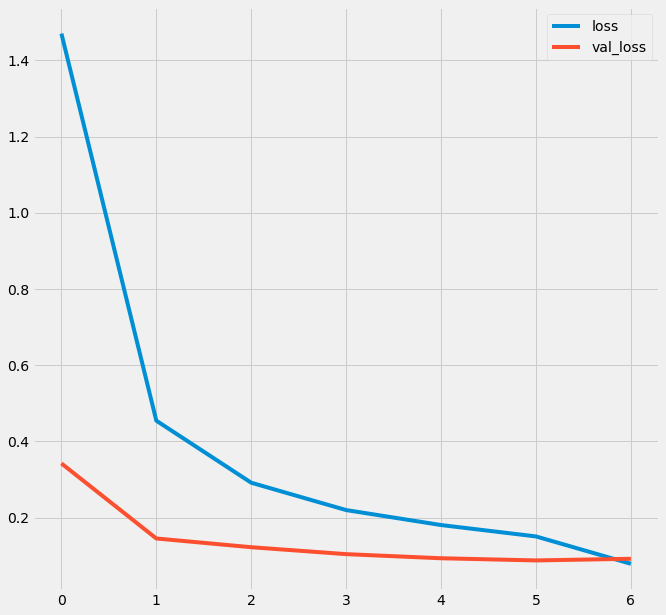

In [26]:
pd.DataFrame(history_one.history,columns=['loss',"val_loss"]).plot(figsize=(10,10))

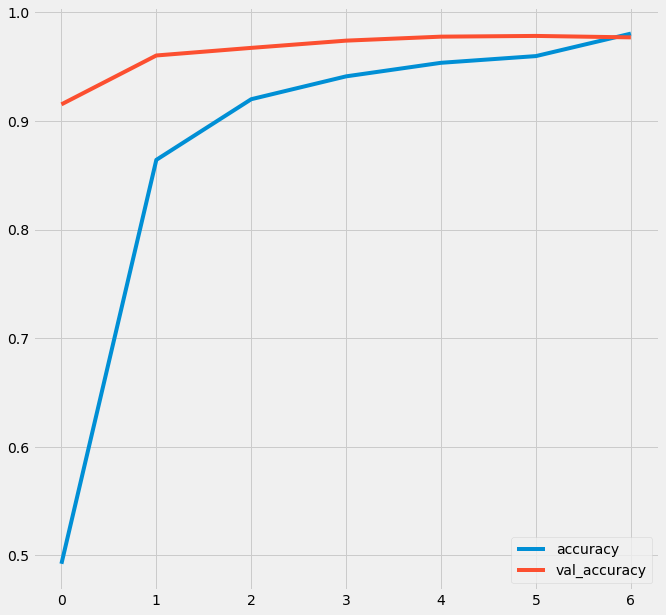

In [27]:
pd.DataFrame(history_one.history,columns=['accuracy',"val_accuracy"]).plot(figsize=(10,10))

In [ ]:
# help(pd.DataFrame.plot)

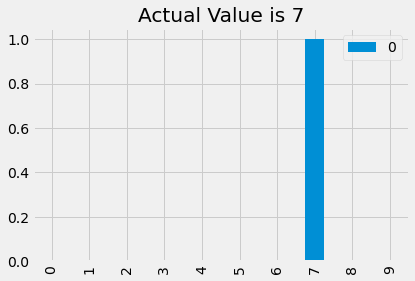

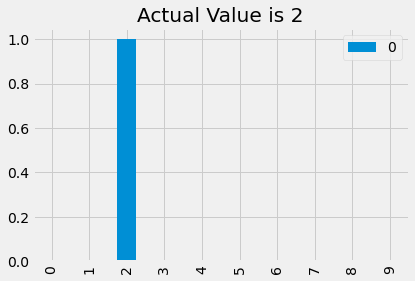

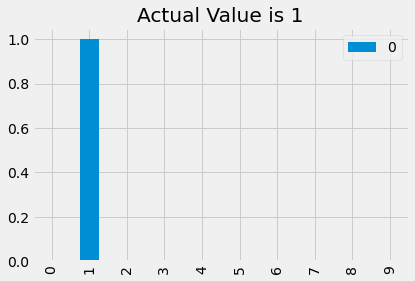

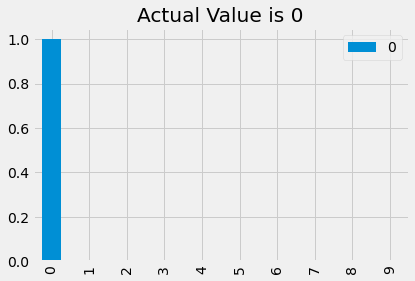

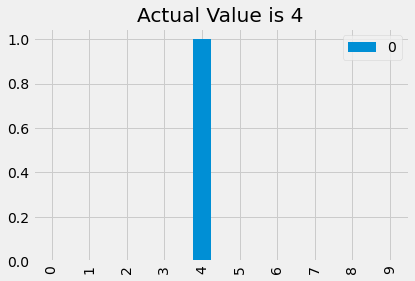

In [28]:
y_pre = model_one.predict(x_test)
for i in range(5):
  pd.DataFrame(y_pre[i],np.arange(0,10)).plot(kind="bar",title=f"Actual Value is {y_test[i]}")

In [29]:
for i in range(10):
  print(f"actual Value is {y_test[i]}")
  print(f"predicted Value is {np.argmax(y_pre[i])}")

actual Value is 7
predicted Value is 7
actual Value is 2
predicted Value is 2
actual Value is 1
predicted Value is 1
actual Value is 0
predicted Value is 0
actual Value is 4
predicted Value is 4
actual Value is 1
predicted Value is 1
actual Value is 4
predicted Value is 4
actual Value is 9
predicted Value is 9
actual Value is 5
predicted Value is 5
actual Value is 9
predicted Value is 9


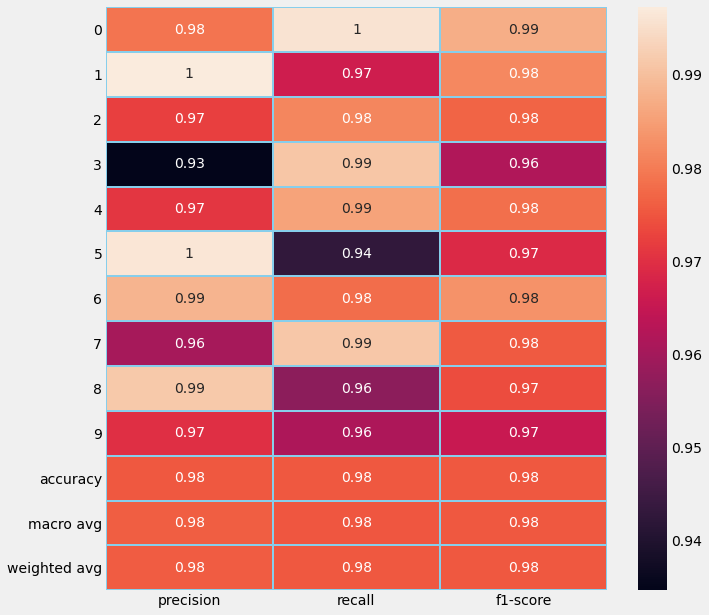

In [30]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(classification_report(y_test,np.argmax(y_pre,axis=1),output_dict=True))[:-1].T,annot=True,linewidths=1,linecolor="skyblue")

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38c6f657d0>)

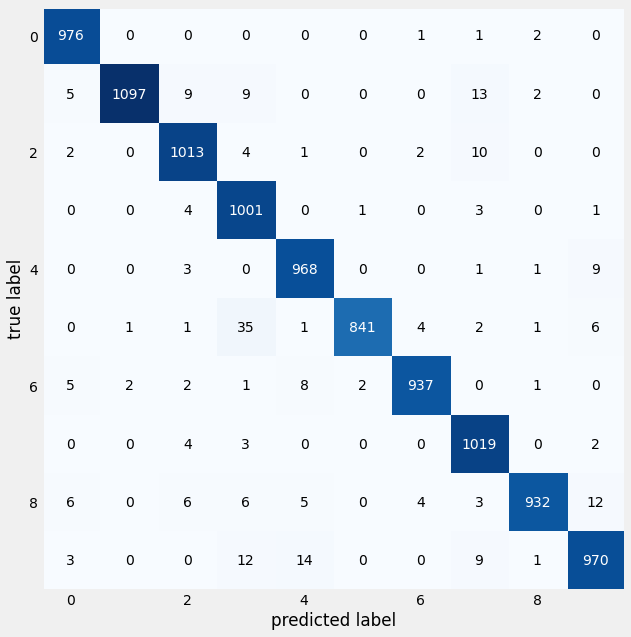

In [31]:
ml.plot_confusion_matrix(confusion_matrix(y_test,np.argmax(y_pre,axis=1)),figsize=(10,10))

# ***Second Model***

In [32]:
model_two = tf.keras.models.Sequential()
model_two.add(tf.keras.layers.Conv1D(32,kernel_size=3,padding="same",kernel_initializer="he_uniform",input_shape=(28,28)))
model_two.add(tf.keras.layers.LeakyReLU())
# model_two.add(tf.keras.layers.GaussianNoise(0.001))
model_two.add(tf.keras.layers.Conv1D(32,kernel_size=3,padding="same",kernel_initializer="he_uniform"))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.MaxPooling1D())
model_two.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="same",kernel_initializer="he_uniform"))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="same",kernel_initializer="he_uniform"))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.MaxPooling1D())
model_two.add(tf.keras.layers.Conv1D(64,kernel_size=3,padding="same",kernel_initializer="he_uniform"))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.Flatten())
model_two.add(tf.keras.layers.GaussianDropout(0.5))
model_two.add(tf.keras.layers.Dense(128))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.GaussianDropout(0.5))
model_two.add(tf.keras.layers.Dense(128))
model_two.add(tf.keras.layers.LeakyReLU())
model_two.add(tf.keras.layers.GaussianDropout(0.5))
model_two.add(tf.keras.layers.Dense(10,activation="softmax"))

In [33]:
model_two.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 28, 32)            2720      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 32)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 28, 32)            3104      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 32)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 14, 64)            6208      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 64)           

In [34]:
model_two.compile(optimizer=tf.keras.optimizers.SGD(0.001,momentum=0.9,nesterov=True),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [35]:
history_two = model_two.fit(x_train,y_train,batch_size=128,epochs=1000,
          validation_data=(x_train_val,y_train_val),verbose=1,
          callbacks=[CustomCallback()])

Epoch 1/1000
446/446 [==============================] - 5s 10ms/step - loss: 1.8961 - accuracy: 0.3296 - val_loss: 0.8645 - val_accuracy: 0.7887
Epoch 2/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.9323 - accuracy: 0.6849 - val_loss: 0.4070 - val_accuracy: 0.8907
Epoch 3/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.6214 - accuracy: 0.7974 - val_loss: 0.2790 - val_accuracy: 0.9203
Epoch 4/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.4814 - accuracy: 0.8493 - val_loss: 0.2213 - val_accuracy: 0.9353
Epoch 5/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.3968 - accuracy: 0.8772 - val_loss: 0.1832 - val_accuracy: 0.9517
Epoch 6/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.3386 - accuracy: 0.8983 - val_loss: 0.1550 - val_accuracy: 0.9573
Epoch 7/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.3017 - accuracy: 0.9087 - val_loss: 0.1417 - val_accuracy

In [63]:
sceond_model_loss = model_two.evaluate(x_test,y_test)[0]
sceond_model_acc = model_two.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.4981 - accuracy: 0.9715


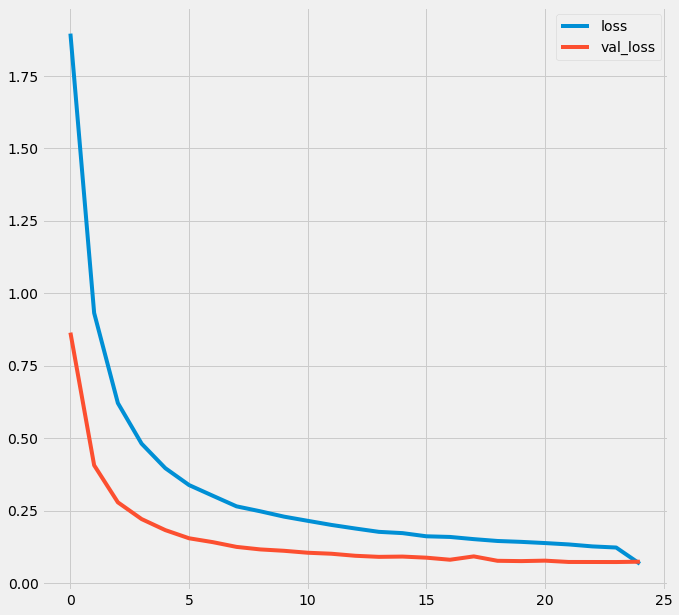

In [37]:
pd.DataFrame(history_two.history,columns=['loss',"val_loss"]).plot(figsize=(10,10))

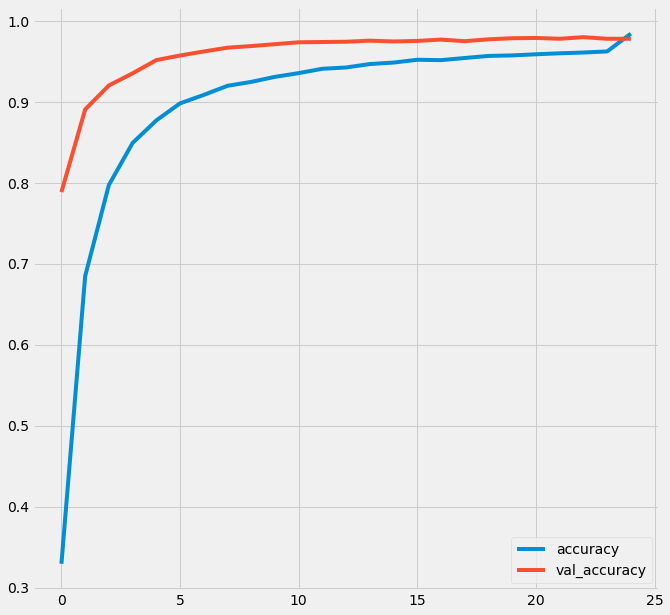

In [38]:
pd.DataFrame(history_two.history,columns=['accuracy',"val_accuracy"]).plot(figsize=(10,10))

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b6948990>)

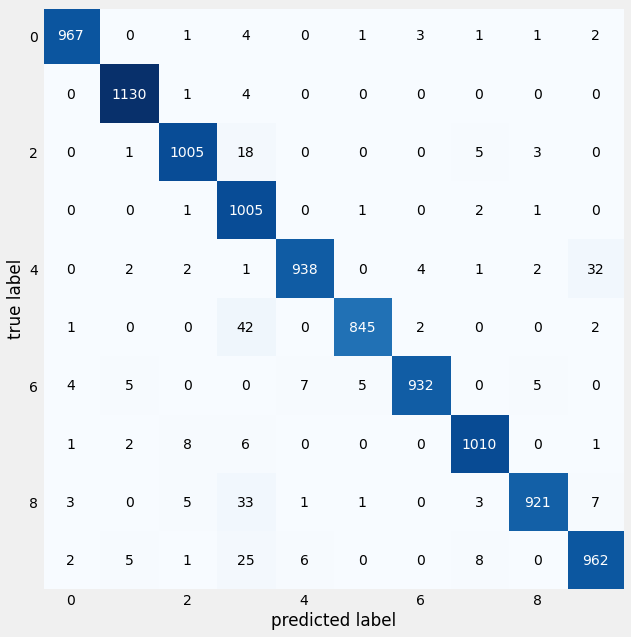

In [70]:
y_pre_two = model_two.predict(x_test)
ml.plot_confusion_matrix(confusion_matrix(y_test,np.argmax(y_pre_two,axis=1)),figsize=(10,10))

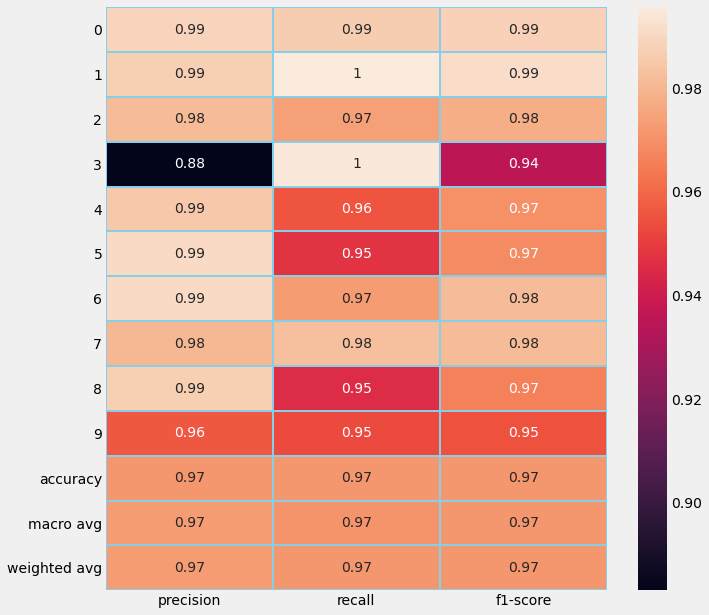

In [41]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(classification_report(y_test,np.argmax(y_pre_two,axis=1),output_dict=True))[:-1].T,annot=True,linewidths=1,linecolor="skyblue")

# ***Third Model***

In [67]:
model_three = tf.keras.models.Sequential()
model_three.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="elu",padding="same",kernel_initializer="he_uniform",input_shape=(28,28)))
# model_two.add(tf.keras.layers.GaussianNoise(0.01))
model_three.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="elu",padding="same",kernel_initializer="he_uniform"))
model_three.add(tf.keras.layers.MaxPooling1D())
model_three.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="elu",padding="same",kernel_initializer="he_uniform"))
model_three.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="elu",padding="same",kernel_initializer="he_uniform"))
# model_three.add(tf.keras.layers.MaxPooling1D())
model_three.add(tf.keras.layers.Conv1D(128,kernel_size=3,strides=2,activation="elu",padding="same",kernel_initializer="he_uniform"))
model_three.add(tf.keras.layers.Flatten())
model_three.add(tf.keras.layers.GaussianDropout(0.5))
model_three.add(tf.keras.layers.Dense(128,activation="elu"))
model_three.add(tf.keras.layers.GaussianDropout(0.5))
model_three.add(tf.keras.layers.Dense(128,activation="elu"))
model_three.add(tf.keras.layers.GaussianDropout(0.5))
model_three.add(tf.keras.layers.Dense(10,activation="softmax"))

In [43]:
model_three.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 14, 32)            2720      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 7, 32)             3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 2, 64)             6208      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 1, 128)            24704     
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [68]:
model_three.compile(optimizer=tf.keras.optimizers.SGD(0.001,momentum=0.9,nesterov=True),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_three = model_three.fit(x_train,y_train,batch_size=128,epochs=1000,
          validation_data=(x_train_val,y_train_val),verbose=1,
          callbacks=[CustomCallback()])

Epoch 1/1000
446/446 [==============================] - 4s 8ms/step - loss: 1.7375 - accuracy: 0.3909 - val_loss: 0.7873 - val_accuracy: 0.7753
Epoch 2/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.9122 - accuracy: 0.6892 - val_loss: 0.4537 - val_accuracy: 0.8653
Epoch 3/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.6378 - accuracy: 0.7919 - val_loss: 0.3376 - val_accuracy: 0.8993
Epoch 4/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.5049 - accuracy: 0.8398 - val_loss: 0.2742 - val_accuracy: 0.9180
Epoch 5/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.4214 - accuracy: 0.8679 - val_loss: 0.2352 - val_accuracy: 0.9287
Epoch 6/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.3704 - accuracy: 0.8869 - val_loss: 0.2146 - val_accuracy: 0.9363
Epoch 7/1000
446/446 [==============================] - 3s 8ms/step - loss: 0.3297 - accuracy: 0.8993 - val_loss: 0.1928 - val_accuracy:

In [69]:
third_model_loss = model_three.evaluate(x_test,y_test)[0]
third_model_acc = model_three.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 3.6480 - accuracy: 0.6406


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b7eba790>)

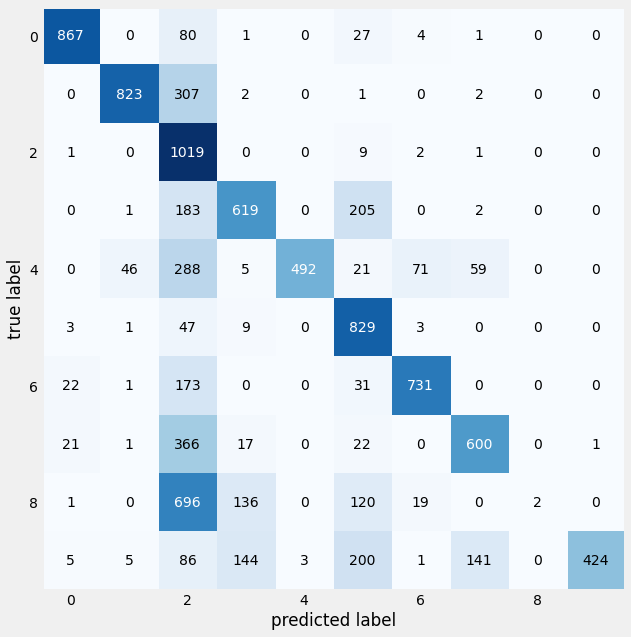

In [72]:
y_pre_three = model_three.predict(x_test)
ml.plot_confusion_matrix(confusion_matrix(y_test,np.argmax(y_pre_three,axis=1)),figsize=(10,10))

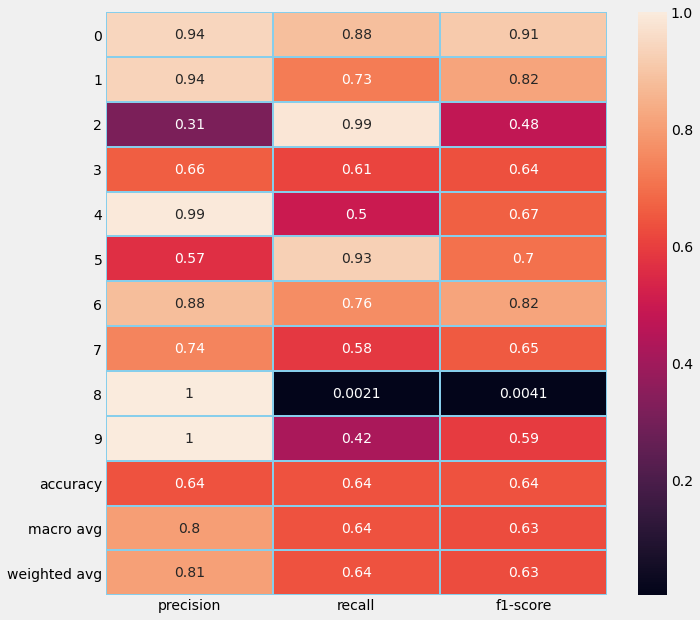

In [74]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(classification_report(y_test,np.argmax(y_pre_three,axis=1),output_dict=True))[:-1].T,annot=True,linewidths=1,linecolor="skyblue")

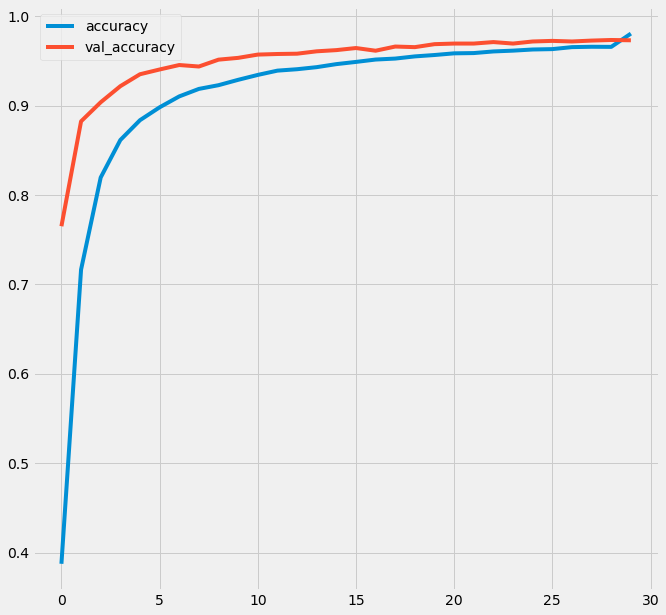

In [46]:
pd.DataFrame(history_three.history,columns=['accuracy',"val_accuracy"]).plot(figsize=(10,10))

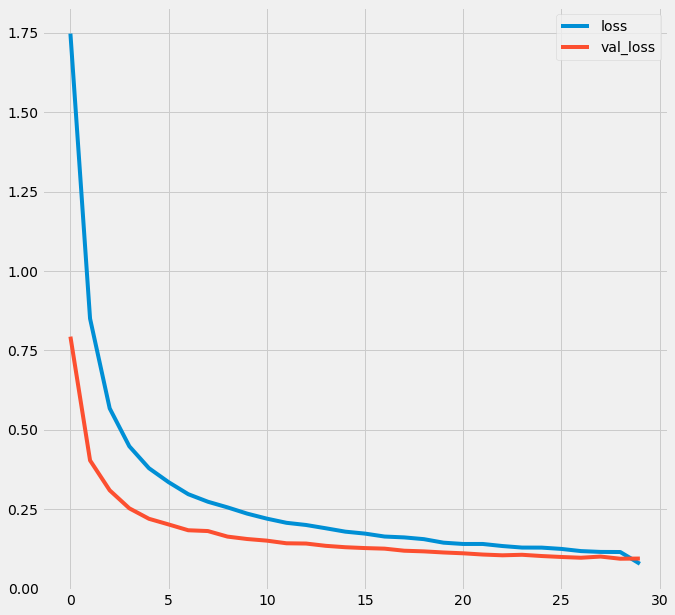

In [47]:
pd.DataFrame(history_three.history,columns=['loss',"val_loss"]).plot(figsize=(10,10))

# ***Fourth Model***

In [48]:
model_four = tf.keras.models.Sequential()
model_four.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="gelu",padding="same",kernel_initializer="he_uniform",input_shape=(28,28)))
# model_two.add(tf.keras.layers.GaussianNoise(0.01))
model_four.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="gelu",padding="same",kernel_initializer="he_uniform"))
model_four.add(tf.keras.layers.MaxPooling1D())
model_four.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="gelu",padding="same",kernel_initializer="he_uniform"))
model_four.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="gelu",padding="same",kernel_initializer="he_uniform"))
# model_three.add(tf.keras.layers.MaxPooling1D())
model_four.add(tf.keras.layers.Conv1D(128,kernel_size=3,strides=2,activation="gelu",padding="same",kernel_initializer="he_uniform"))
model_four.add(tf.keras.layers.Flatten())
model_four.add(tf.keras.layers.GaussianDropout(0.5))
model_four.add(tf.keras.layers.Dense(128,activation="elu"))
model_four.add(tf.keras.layers.GaussianDropout(0.5))
model_four.add(tf.keras.layers.Dense(128,activation="elu"))
model_four.add(tf.keras.layers.GaussianDropout(0.5))
model_four.add(tf.keras.layers.Dense(10,activation="softmax"))

In [49]:
model_four.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 14, 32)            2720      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 7, 32)             3104      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 2, 64)             6208      
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 1, 64)             12352     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 128)            24704     
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)              

In [50]:
model_four.compile(optimizer=tf.keras.optimizers.SGD(0.001,momentum=0.9,nesterov=True),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_four = model_four.fit(x_train,y_train,batch_size=128,epochs=1000,
          validation_data=(x_train_val,y_train_val),verbose=1,
          callbacks=[CustomCallback()])

Epoch 1/1000
446/446 [==============================] - 5s 9ms/step - loss: 2.2401 - accuracy: 0.1910 - val_loss: 1.9697 - val_accuracy: 0.3847
Epoch 2/1000
446/446 [==============================] - 4s 9ms/step - loss: 1.5989 - accuracy: 0.4537 - val_loss: 0.9078 - val_accuracy: 0.7163
Epoch 3/1000
446/446 [==============================] - 4s 9ms/step - loss: 0.9285 - accuracy: 0.6864 - val_loss: 0.5103 - val_accuracy: 0.8443
Epoch 4/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.6455 - accuracy: 0.7940 - val_loss: 0.3785 - val_accuracy: 0.8847
Epoch 5/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.5084 - accuracy: 0.8437 - val_loss: 0.3070 - val_accuracy: 0.9060
Epoch 6/1000
446/446 [==============================] - 4s 9ms/step - loss: 0.4223 - accuracy: 0.8733 - val_loss: 0.2606 - val_accuracy: 0.9183
Epoch 7/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.3705 - accuracy: 0.8899 - val_loss: 0.2320 - val_accuracy:

In [65]:
fourth_model_loss = model_four.evaluate(x_test,y_test)[0]
fourth_model_acc = model_four.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 1.0089 - accuracy: 0.9182


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b7d2b710>)

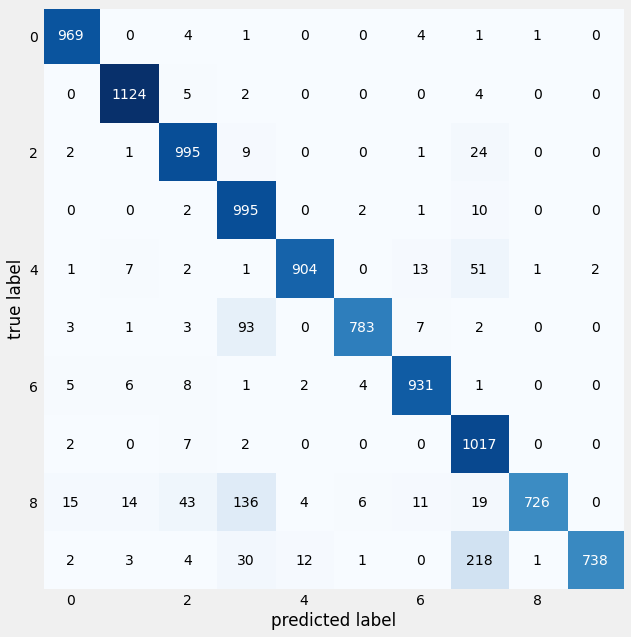

In [73]:
y_pre_four = model_four.predict(x_test)
ml.plot_confusion_matrix(confusion_matrix(y_test,np.argmax(y_pre_four,axis=1)),figsize=(10,10))

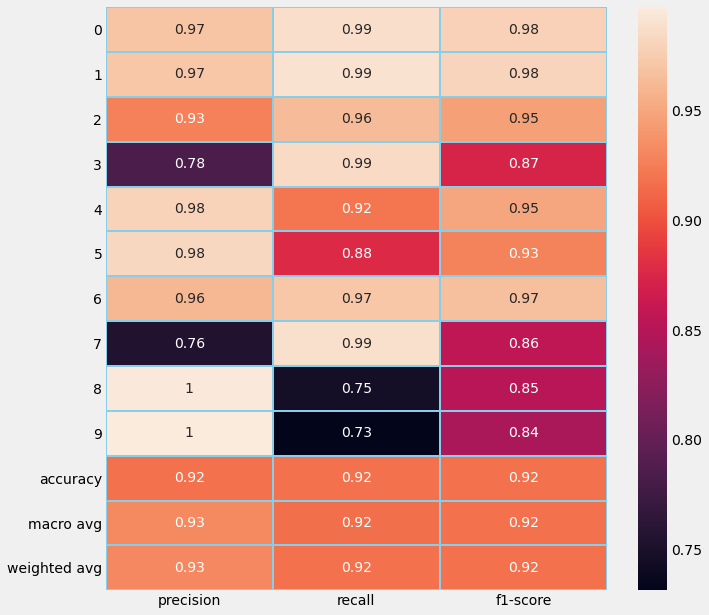

In [75]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(classification_report(y_test,np.argmax(y_pre_four,axis=1),output_dict=True))[:-1].T,annot=True,linewidths=1,linecolor="skyblue")

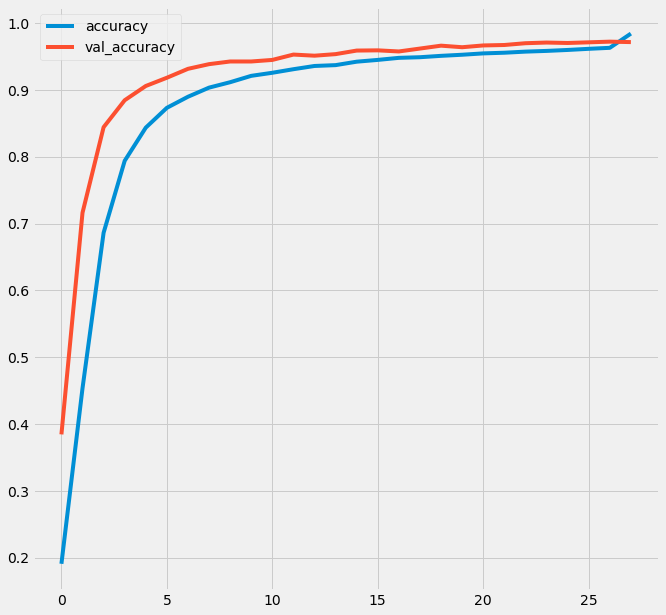

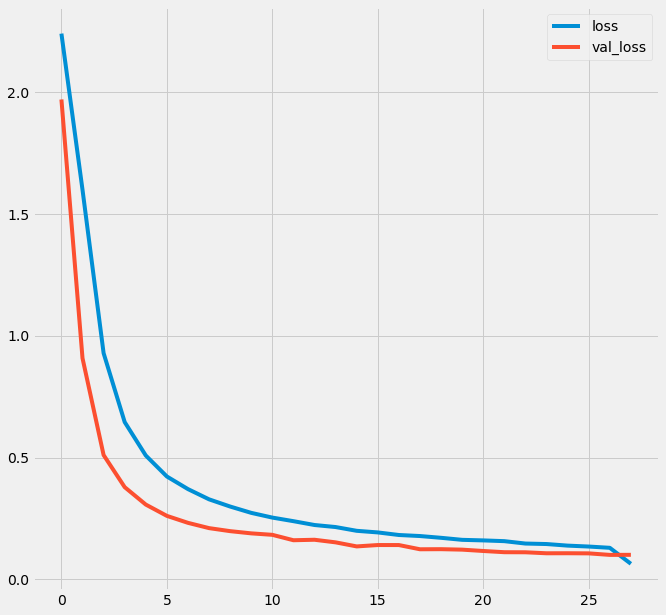

In [52]:
pd.DataFrame(history_four.history,columns=['accuracy',"val_accuracy"]).plot(figsize=(10,10))
pd.DataFrame(history_four.history,columns=['loss',"val_loss"]).plot(figsize=(10,10))

# ***Fiveth Model***

In [53]:
model_five = tf.keras.models.Sequential()
model_five.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="swish",padding="same",kernel_initializer="he_uniform",input_shape=(28,28)))
model_five.add(tf.keras.layers.Conv1D(32,kernel_size=3,strides=2,activation="swish",padding="same",kernel_initializer="he_uniform"))
model_five.add(tf.keras.layers.MaxPooling1D())
model_five.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="swish",padding="same",kernel_initializer="he_uniform"))
model_five.add(tf.keras.layers.Conv1D(64,kernel_size=3,strides=2,activation="swish",padding="same",kernel_initializer="he_uniform"))
# model_three.add(tf.keras.layers.MaxPooling1D())
model_five.add(tf.keras.layers.Conv1D(128,kernel_size=3,strides=2,activation="swish",padding="same",kernel_initializer="he_uniform"))
model_five.add(tf.keras.layers.Flatten())
model_five.add(tf.keras.layers.Dropout(0.5))
model_five.add(tf.keras.layers.Dense(128,activation="relu"))
model_five.add(tf.keras.layers.Dropout(0.5))
model_five.add(tf.keras.layers.Dense(128,activation="relu"))
model_five.add(tf.keras.layers.Dropout(0.5))
model_five.add(tf.keras.layers.Dense(10,activation="softmax"))

In [54]:
model_five.compile(optimizer=tf.keras.optimizers.SGD(0.001,momentum=0.9,nesterov=True),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_five = model_five.fit(x_train,y_train,batch_size=128,epochs=1000,
          validation_data=(x_train_val,y_train_val),verbose=1,
          callbacks=[CustomCallback()])

Epoch 1/1000
446/446 [==============================] - 5s 9ms/step - loss: 2.2995 - accuracy: 0.1268 - val_loss: 2.2863 - val_accuracy: 0.1787
Epoch 2/1000
446/446 [==============================] - 4s 8ms/step - loss: 2.2825 - accuracy: 0.1713 - val_loss: 2.2585 - val_accuracy: 0.2757
Epoch 3/1000
446/446 [==============================] - 4s 8ms/step - loss: 2.2383 - accuracy: 0.2181 - val_loss: 2.1368 - val_accuracy: 0.4250
Epoch 4/1000
446/446 [==============================] - 4s 8ms/step - loss: 2.0149 - accuracy: 0.3168 - val_loss: 1.5912 - val_accuracy: 0.5400
Epoch 5/1000
446/446 [==============================] - 4s 8ms/step - loss: 1.5693 - accuracy: 0.4635 - val_loss: 1.0310 - val_accuracy: 0.6937
Epoch 6/1000
446/446 [==============================] - 4s 8ms/step - loss: 1.1937 - accuracy: 0.5899 - val_loss: 0.7223 - val_accuracy: 0.7837
Epoch 7/1000
446/446 [==============================] - 4s 8ms/step - loss: 0.9169 - accuracy: 0.6953 - val_loss: 0.5128 - val_accuracy:

In [66]:
fiveth_model_loss = model_five.evaluate(x_test,y_test)[0]
fiveth_model_acc = model_five.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.8280 - accuracy: 0.9528


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b71c0ed0>)

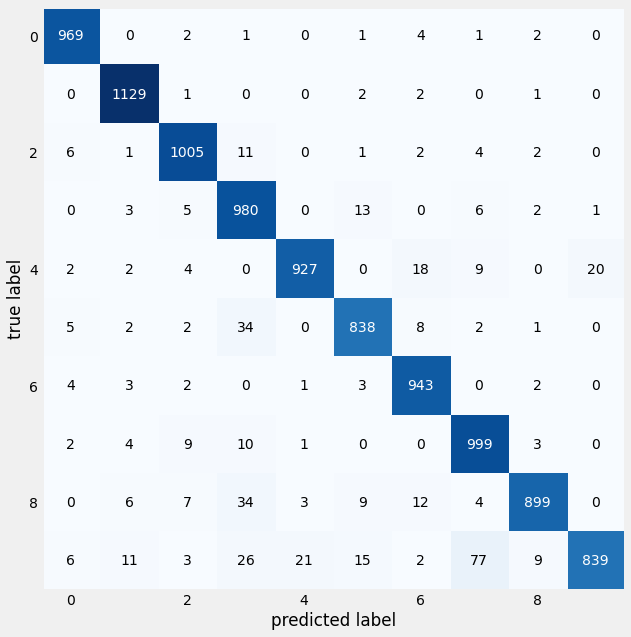

In [76]:
y_pre_five = model_five.predict(x_test)
ml.plot_confusion_matrix(confusion_matrix(y_test,np.argmax(y_pre_five,axis=1)),figsize=(10,10))

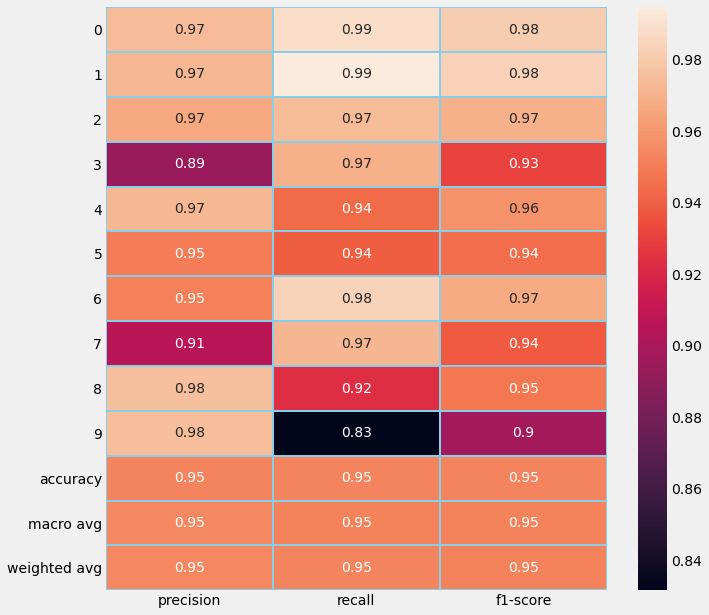

In [77]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(classification_report(y_test,np.argmax(y_pre_five,axis=1),output_dict=True))[:-1].T,annot=True,linewidths=1,linecolor="skyblue")

# ***ACCURACY OF ALL MODEL***

In [93]:
data_table.DataTable(pd.DataFrame({"First Model Accuracy": [str(first_model_acc *100)[0:4]],
                                   "Second Model Accuracy": [str(sceond_model_acc*100)[0:4]],
                                   "Third Model Accuracy": [str(third_model_acc*100)[0:4]],
                                   "Fourth Model Accuracy": [str(fourth_model_acc*100)[0:4]],
                                   "Fiveth Model Accuracy": [str(fiveth_model_acc*100)[0:4]]}))

,First Model Accuracy,Second Model Accuracy,Third Model Accuracy,Fourth Model Accuracy,Fiveth Model Accuracy
0,97.5,97.1,64.0,91.8,95.2


# ***LOSSES OF ALL MODELS***

In [103]:
data_table.DataTable(pd.DataFrame({"First Model Loss": [first_model_loss],
                                   "Second Model Loss": [sceond_model_loss],
                                   "Third Model Loss": [third_model_loss],
                                   "Fourth Model Loss": [fourth_model_loss],
                                   "Fiveth Model Loss": [fiveth_model_loss]}))

,First Model Loss,Second Model Loss,Third Model Loss,Fourth Model Loss,Fiveth Model Loss
0,0.568449,0.49808,3.648039,1.008861,0.828039
